<a href="https://colab.research.google.com/github/jpriyam/SHALA2020/blob/master/Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
file_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv"
df=pd.read_csv(file_url)
#df.head()
file_url1 = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv"
movies=pd.read_csv(file_url1)
movies.head()


,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover


In [0]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [0]:
# Print the first five rows of MonthlyRate
df.MonthlyRate.head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [0]:
# Find the details of MonthlyRate 
df.MonthlyRate.describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [0]:
# Check for missing values 
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#df.isna()
a=df.isna().sum().sum()
if a!=0:
  df.shape
# Drop the missing values 
  df.dropna()
  df.shape
# Print the size of df after dropping 
else:
  print("no null values")




no null values


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
MonthlyRateNew=(df.MonthlyRate-df.MonthlyRate.mean())/df.MonthlyRate.std()
MonthlyRateNew.head()
df.insert(19, 'MonthlyRateNew', MonthlyRateNew)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRateNew,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,0.742749,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,1.512813,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,-1.680795,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,1.264827,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,0.338849,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [0]:
# Check for missing values 
a=movies.isna().sum().sum()
a
# Drop the missing values 
pd.set_option("display.max_rows", None, "display.max_columns", None)
#movies.apply(lambda x: sum(x.isnull().values), axis = 1)
sum([True for idx,row in movies.iterrows() if any(row.isnull())])
# Replace the missing values 
# You can use SimpleImputer of sklearn for this




28

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy ='mean')
movies["runtime"] = imp.fit_transform(movies[["runtime"]]).ravel()
print(movies.runtime.isna().sum())

0


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

Text(0.5, 0, 'Age')

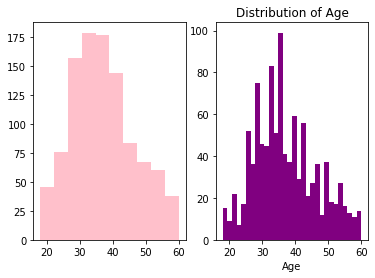

In [0]:
# Plot and modify the histogram of Age
plt.subplot(1,2,1)
plt.hist(df.Age,color="pink")
plt.subplot(1,2,2)
plt.hist(df.Age, bins = 30, color='purple', orientation='vertical')
plt.title("Distribution of Age")
plt.xlabel("Age")

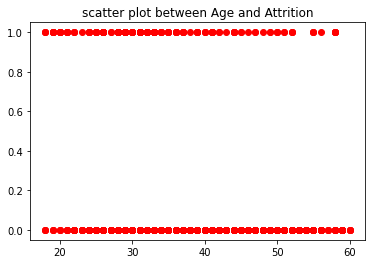

Probabilty whether people more than 50 years are more likely to leave the company: 0.1206896551724138 


In [0]:
# Draw a scatter plot between Age and Attrition
plt.scatter(df.Age, df.Attrition, c='red')
plt.title('scatter plot between Age and Attrition')
plt.show()
old=df[(df['Age']>50)]
den=len(old)
num=(old.Attrition==1).sum()
prob=num/den
print('Probabilty whether people more than 50 years are more likely to leave the company: {} '.format(prob))

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64


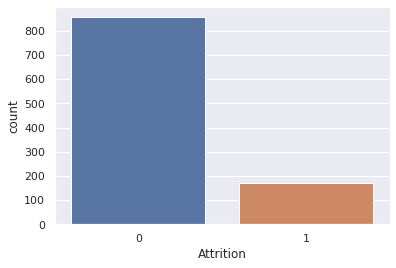

In [0]:
# Get a series of counts of values of Attrition
attr = df['Attrition'].value_counts()
print(attr)
# Draw a countplot for Attrition 

# You may use countplot of seaborn for this 
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="Attrition", data=df)


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

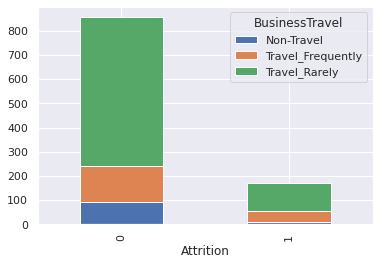

Travel_Rarely


In [0]:
# Draw a cross tab of Attritiona and BusinessTravel 

ct = pd.crosstab(df.Attrition, df.BusinessTravel)

ct.plot.bar(stacked=True)


plt.show()
# You may use crosstab of pandas for this 
maxs=df['BusinessTravel'].value_counts().idxmax()
print(maxs)

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

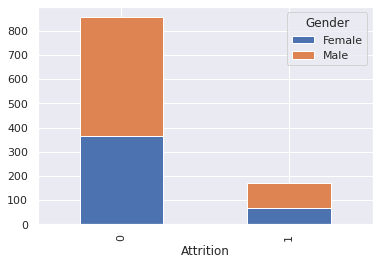

In [0]:
ct = pd.crosstab(df.Attrition, df.Gender)

ct.plot.bar(stacked=True)


plt.show()

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

YearsAtCompany are Highly Skewed


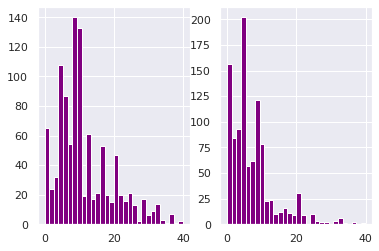

In [0]:
# Draw a histogram of TotalWorkingYears with 30 bins
# Plot and modify the histogram of Age
plt.subplot(1,2,1)
plt.hist(df.TotalWorkingYears, bins = 30, color='purple', orientation='vertical')
# Draw a histogram of YearsAtCompany
plt.subplot(1,2,2)
plt.hist(df.YearsAtCompany, bins = 30, color='purple', orientation='vertical')
if(df.YearsAtCompany.skew()>1):
  print("YearsAtCompany are Highly Skewed")

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

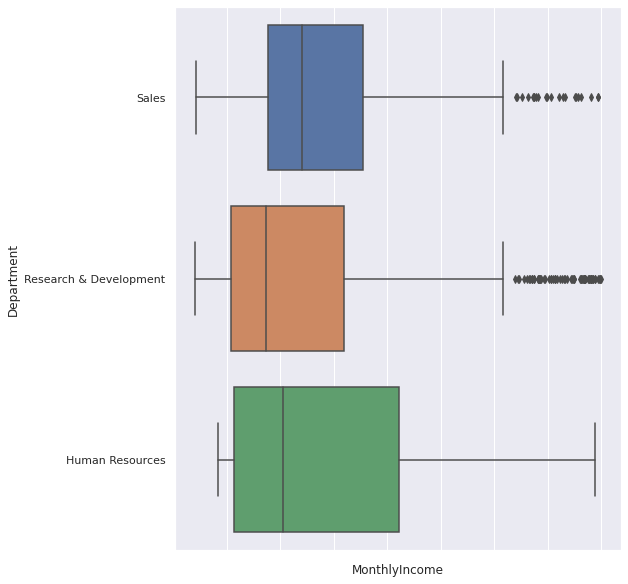

In [0]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
plt.figure(figsize=(8,10))
chart = sns.boxplot('MonthlyIncome', 'Department', data=df)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

Sales Executive


([<matplotlib.patches.Wedge at 0x7f75f9e5cc88>,
 [Text(0.8542961340812947, 0.6929488547459725, 'Sales Executive'),
  Text(-0.45945693362420414, 0.9994495115535571, 'Research Scientist'),
  Text(-1.0981462091349679, -0.06383496974620964, 'Laboratory Technician'),
  Text(-0.6503653604759383, -0.8871442373667334, 'Manufacturing Director'),
  Text(-0.05712202505487643, -1.0985158507065933, 'Healthcare Representative'),
  Text(0.47770465248811617, -0.9908573383647155, 'Manager'),
  Text(0.841447151537986, -0.708496077031207, 'Research Director'),
  Text(1.03505987357499, -0.37235877606808926, 'Sales Representative'),
  Text(1.09597534812125, -0.0940108308148859, 'Human Resources')])

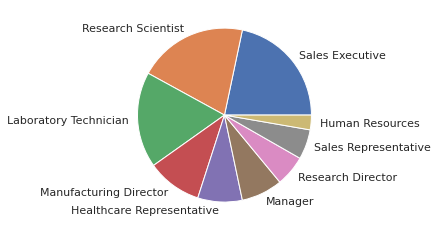

In [0]:
# Create a piechart of JobRole 
role_counts = df.JobRole.value_counts()
maxi=df.JobRole.value_counts().idxmax()
print(maxi)
# You will need to find the counts of unique values in JobRole. 
plt.pie(role_counts, labels=role_counts.index.tolist())
